#### Simulation: Different spatial patterns to understand behavior of TDA adjacency method

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geodata import generate_grid_dataframe,calculate_moran_i

from adjacency_simplex import AdjacencySimplex  # Import the class
from plot_utills import plot_simplicial_complex_gif
from calculate_tda_summaries import compute_persistence

In [2]:
NUM_OF_ITERATIONS = 100
GRID_SIZE = 10

# Set the random seed
np.random.seed(0)
RANDOM_SEED_LIST = np.random.randint(0, 1000, NUM_OF_ITERATIONS)

# create a empty df to store the results
results_df = pd.DataFrame(columns=['Iteration', 'Random Seed','Autocorrlation', 'Moran I', 'Filter Method', 'Number of H0 Points', 'TL', 'AL', 'TML', 'AML'])


for iter in range(NUM_OF_ITERATIONS):
    print(f"Iteration: {iter}")
    RANDOM_SEED = RANDOM_SEED_LIST[iter]

    gdf_none = generate_grid_dataframe(GRID_SIZE, autocorrelation="none", random_seed=RANDOM_SEED)        # No spatial correlation
    gdf_positive = generate_grid_dataframe(GRID_SIZE, autocorrelation="positive", random_seed=RANDOM_SEED) 

    # Calculate Moran’s I
    moran_none = calculate_moran_i(gdf_none, GRID_SIZE)
    moran_positive = calculate_moran_i(gdf_positive, GRID_SIZE)

    for gdf in [gdf_none, gdf_positive]:
        for filter_method in ['up', 'down']:
        
            # Initialize the AdjacencySimplex class
            adj_simplex = AdjacencySimplex(gdf, 'Value', threshold = [0,0.7], filter_method = filter_method)

            # Filter the GeoDataFrame
            filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

            # Calculate the adjacent countries
            adj_simplex.calculate_adjacent_countries()

            # Form the simplicial complex
            simplex = adj_simplex.form_simplicial_complex()

            total_h0_points, tl, al, tml, aml = compute_persistence(simplex,filtered_df, 'Value')

            if filter_method == 'up' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'up' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)


Iteration: 0


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_18857/1750618544.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

In [3]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML
0,0,684,none,0.036149,up,96,63.370093,0.660105,31.685046,0.330053
1,0,684,none,0.036149,down,96,49.199174,0.512491,24.599587,0.256246
2,0,684,positive,0.830601,up,100,65.354073,0.653541,32.677037,0.326770
3,0,684,positive,0.830601,down,100,63.294713,0.632947,31.647356,0.316474
4,1,559,none,-0.057844,up,98,66.956328,0.683228,33.478164,0.341614


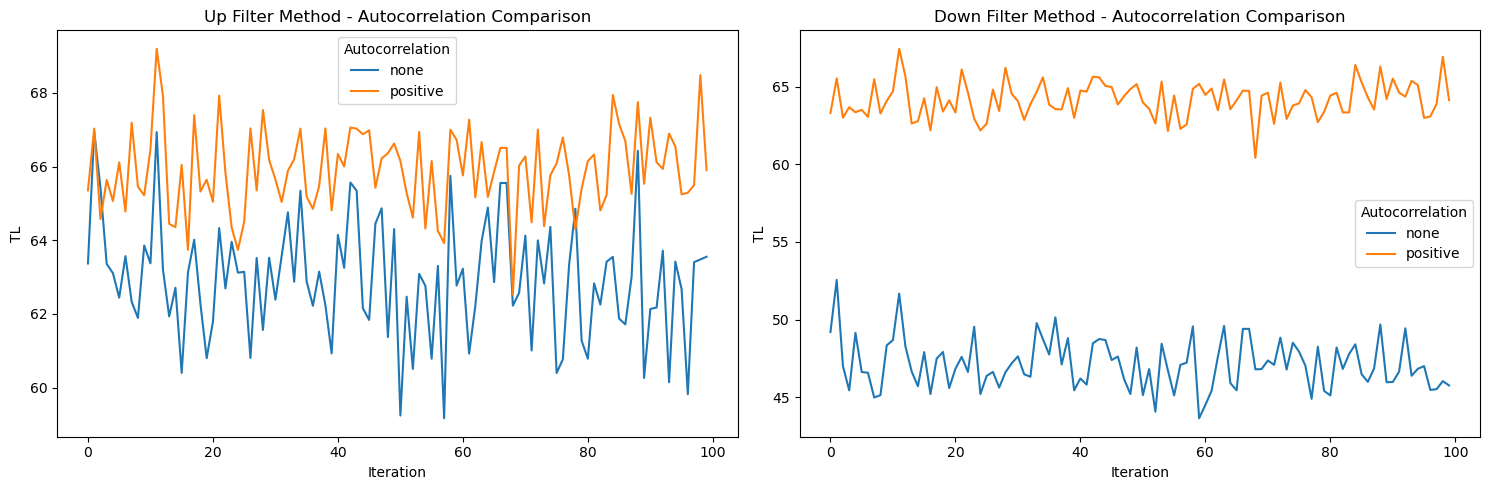

In [4]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['TL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("TL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


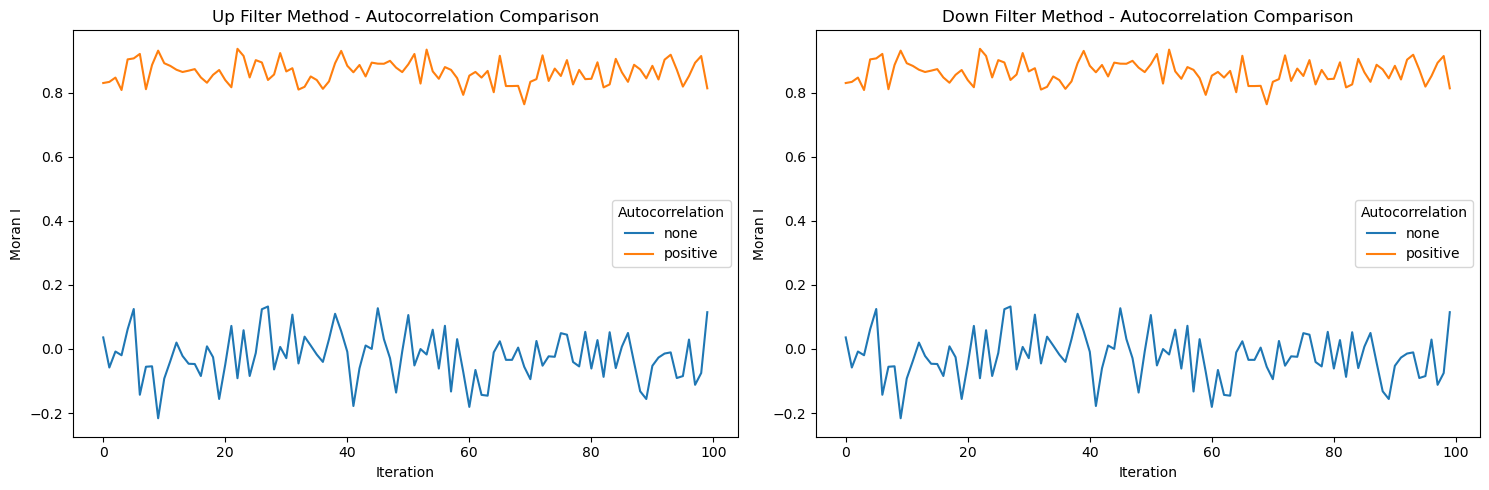

In [5]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['Moran I'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Moran I")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()

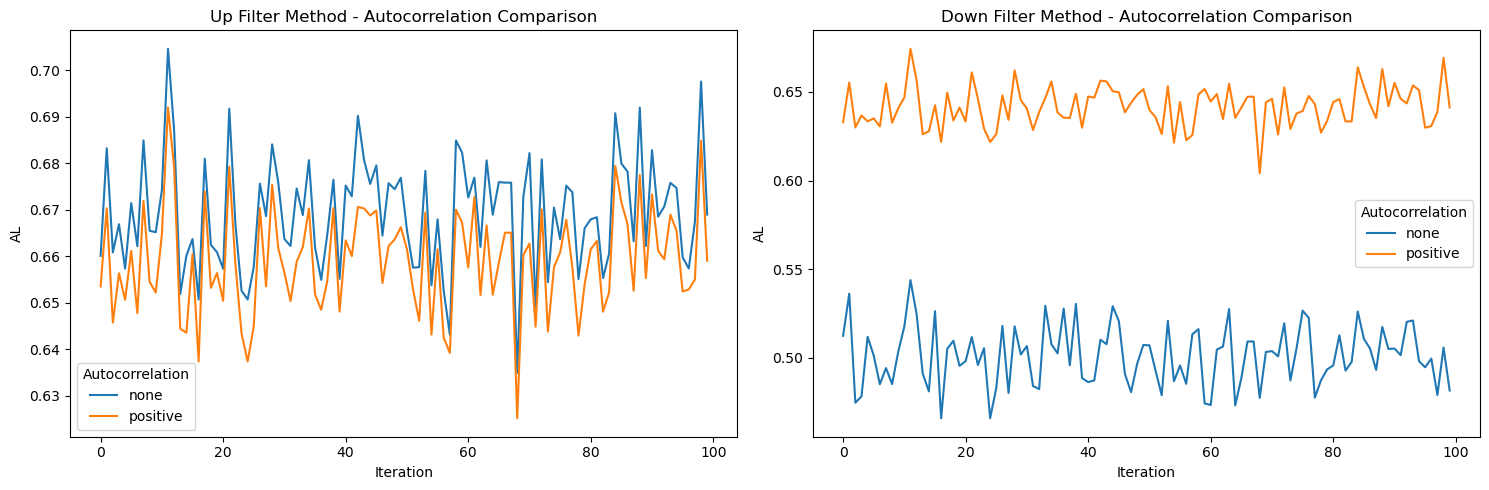

In [6]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['AL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("AL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


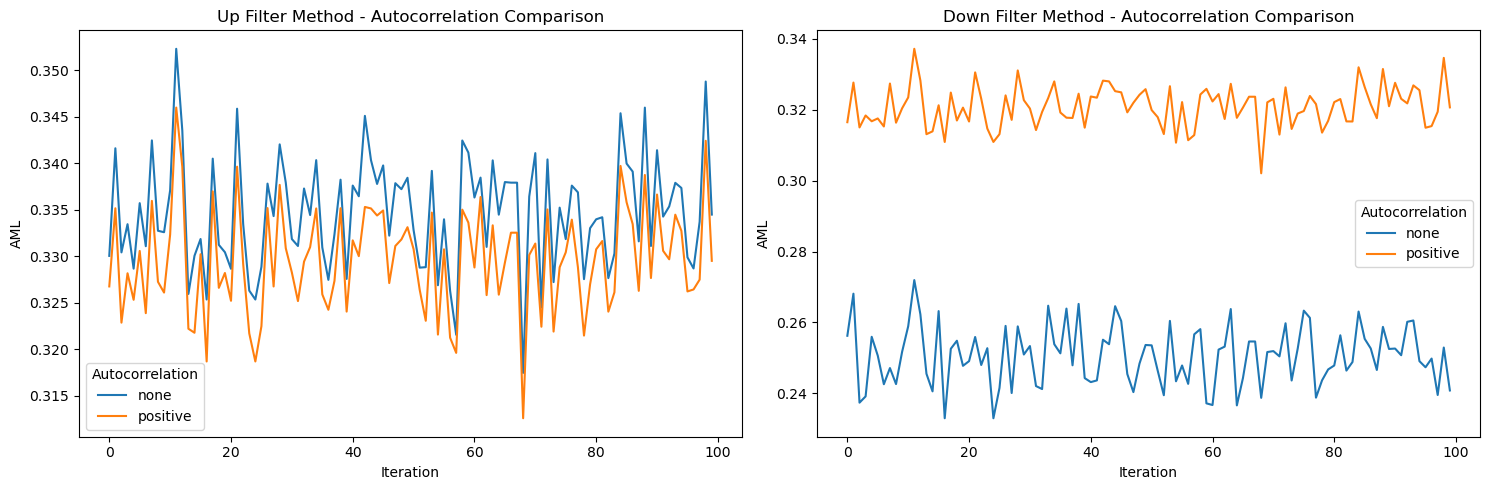

In [7]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['AML'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("AML")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


In [8]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML
0,0,684,none,0.036149,up,96,63.370093,0.660105,31.685046,0.330053
1,0,684,none,0.036149,down,96,49.199174,0.512491,24.599587,0.256246
2,0,684,positive,0.830601,up,100,65.354073,0.653541,32.677037,0.326770
3,0,684,positive,0.830601,down,100,63.294713,0.632947,31.647356,0.316474
4,1,559,none,-0.057844,up,98,66.956328,0.683228,33.478164,0.341614


In [9]:
# summarize AL
results_df.groupby(['Filter Method','Autocorrlation'])['AL'].describe()

count      mean       std       min       25%  \
Filter Method Autocorrlation                                                  
down          none            100.0  0.501299  0.016795  0.465974  0.487358   
              positive        100.0  0.641693  0.011649  0.604130  0.633453   
up            none            100.0  0.669386  0.012069  0.634962  0.660884   
              positive        100.0  0.659181  0.011381  0.625211  0.652123   

                                   50%       75%       max  
Filter Method Autocorrlation                                
down          none            0.502259  0.512063  0.543889  
              positive        0.642224  0.648853  0.674340  
up            none            0.668771  0.676581  0.704605  
              positive        0.659206  0.667413  0.691978

In [10]:
# summarize AL
results_df.groupby(['Filter Method','Autocorrlation'])['AML'].describe()

count      mean       std       min       25%  \
Filter Method Autocorrlation                                                  
down          none            100.0  0.250650  0.008397  0.232987  0.243679   
              positive        100.0  0.320847  0.005825  0.302065  0.316727   
up            none            100.0  0.334693  0.006035  0.317481  0.330442   
              positive        100.0  0.329591  0.005690  0.312606  0.326062   

                                   50%       75%       max  
Filter Method Autocorrlation                                
down          none            0.251129  0.256032  0.271945  
              positive        0.321112  0.324426  0.337170  
up            none            0.334385  0.338290  0.352302  
              positive        0.329603  0.333706  0.345989

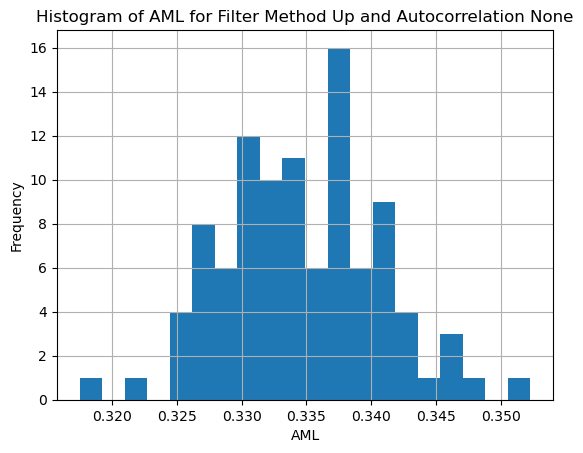

In [11]:
# for filter method up and AML autocorrelation none plot a histogram
results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'none')]['AML'].hist(bins=20)
plt.xlabel('AML')
plt.ylabel('Frequency')
plt.title('Histogram of AML for Filter Method Up and Autocorrelation None')
plt.show()